<ipython-input-3-68adef8651cd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Source'] = label_encoder_source.fit_transform(X['Source'])
<ipython-input-3-68adef8651cd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Destination'] = label_encoder_destination.fit_transform(X['Destination'])


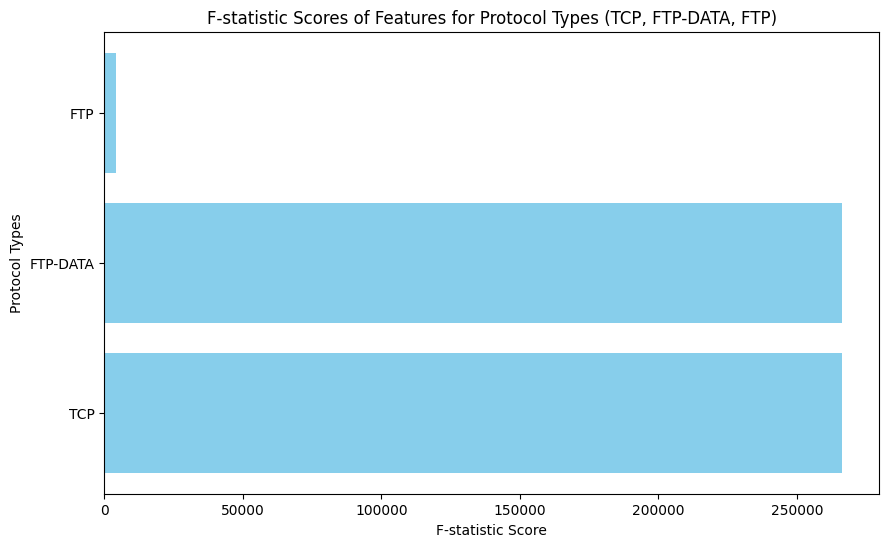

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', sep=',')

# Filter data for specific protocol types (TCP, FTP-DATA, FTP)
tcp_data = data[data['Protocol'] == 'TCP']
ftp_data = data[data['Protocol'] == 'FTP']
ftp_data = data[data['Protocol'] == 'FTP-DATA']

# Combine the filtered data
filtered_data = pd.concat([tcp_data, ftp_data, ftp_data])

# Preprocess the data for protocol vs source and destination ips
X = filtered_data[['Source', 'Destination', 'Length']]  # Features
y = filtered_data['Protocol']  # Target variable

# Encode categorical variables
label_encoder_source = LabelEncoder()
X['Source'] = label_encoder_source.fit_transform(X['Source'])

label_encoder_destination = LabelEncoder()
X['Destination'] = label_encoder_destination.fit_transform(X['Destination'])

# Select features using the F-statistic score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get the F-statistic scores and p-values
f_scores = selector.scores_

# Define protocol types
protocols = ['TCP', 'FTP-DATA', 'FTP']

# Plot the F-statistic scores
plt.figure(figsize=(10, 6))
plt.barh(protocols, f_scores, color='skyblue')
plt.title('F-statistic Scores of Features for Protocol Types (TCP, FTP-DATA, FTP)')
plt.xlabel('F-statistic Score')
plt.ylabel('Protocol Types')
plt.show()